# *Punto 1*

Importación de librerías

In [6]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

## Creación del dataset sintético

El código estableció una semilla para asegurar la reproducibilidad. Luego, seleccionó aleatoriamente entre 1 y 10 centroides y generó sus coordenadas en un rango de -10 a 10. También asignó desviaciones estándar aleatorias para cada centroide. Finalmente, creó un conjunto de datos de 2000 puntos distribuidos alrededor de esos centroides, con etiquetas que indicaban a qué grupo pertenecía cada punto.



In [7]:
# Establecer la semilla para la reproducibilidad
np.random.seed(7)

# Definir la cantidad de centroides aleatoriamente entre 1 y 10
n_centroides = np.random.randint(1, 11)

# Crear los centroides asegurando una mayor distancia entre ellos
blob_centers = np.random.uniform(low=-10, high=10, size=(n_centroides, 2))

# Definir desviaciones estándar para cada centroide (también aleatorias)
blob_std = np.random.uniform(0.1, 1.0, size=n_centroides)

# Generar los datos con los centroides y las desviaciones estándar ajustadas
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Graficando el dataset generado

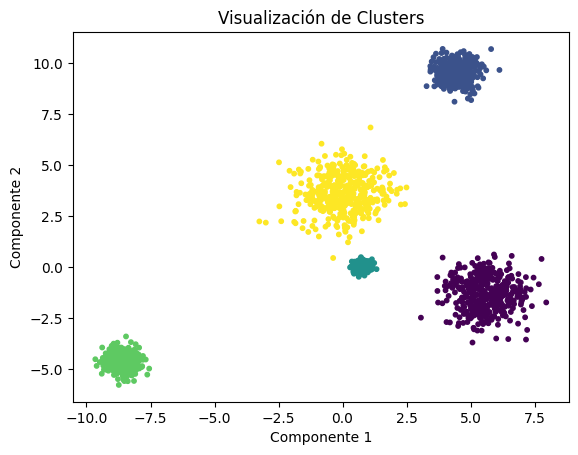

In [8]:
# Visualización para verificar la separación de los clusters
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.title("Visualización de Clusters")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

In [9]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

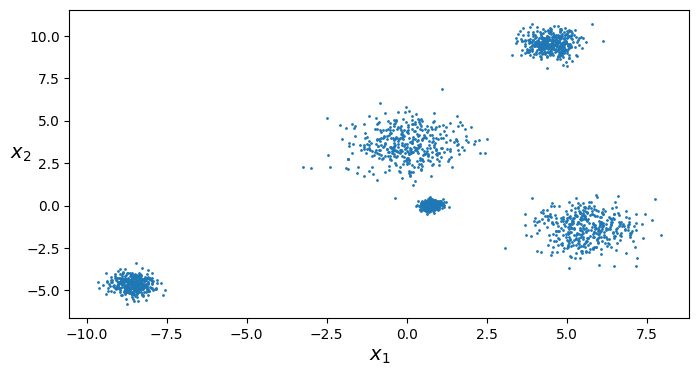

In [10]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

## Clusterizacion con *K-Means*

Se utilizó el algoritmo de *K-Means* para agrupar nuestros datos en `X` en 5 clusters. Primero, creamos una instancia de `KMeans` con 5 clusters y fijamos una semilla aleatoria para garantizar la reproducibilidad. Luego, ajustamos el modelo a nuestros datos y predecimos a qué cluster pertenece cada punto. Las etiquetas resultantes, que indican el cluster asignado para cada dato, las guardamos en `y_pred`.

In [11]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([4, 3, 0, ..., 1, 0, 3], dtype=int32)

In [12]:
kmeans.cluster_centers_

array([[ 5.59863435e+00, -1.32522325e+00],
       [-8.56233618e+00, -4.63780225e+00],
       [ 4.49447529e+00,  9.54407045e+00],
       [ 7.43856643e-01,  5.09283404e-02],
       [-4.54383451e-03,  3.64110997e+00]])

*Visualización de datos y clustering con K-Means*

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

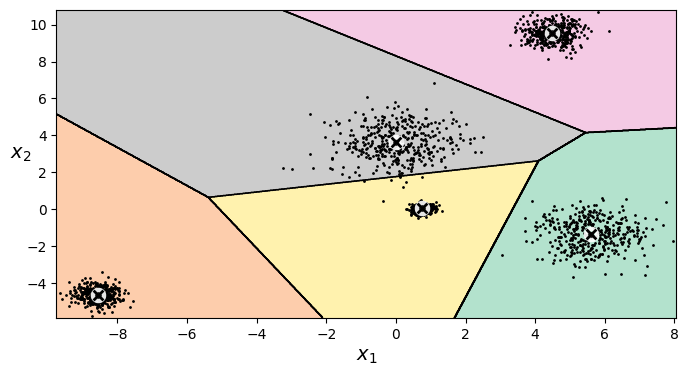

In [14]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Se aplica el algoritmo K-Means de manera secuencial, ajustándolo al conjunto de datos X con diferentes números de iteraciones (1, 2 y 3).
Se utilizó una inicialización aleatoria para los centroides y se sigue el algoritmo de Lloyd para actualizar los clusters.

In [15]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

*Visualización del proceso iterativo de K-Means*

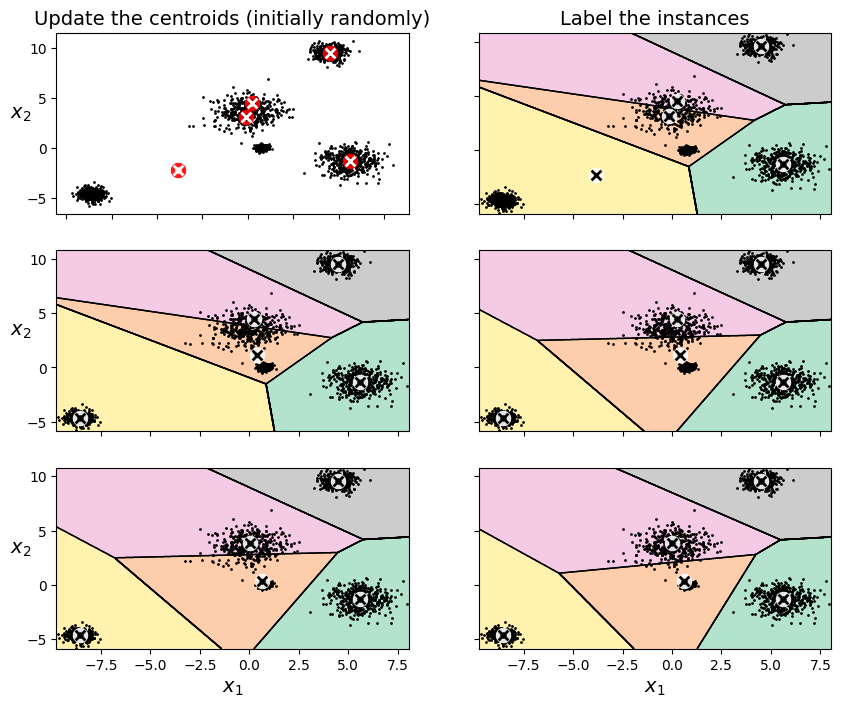

In [16]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [17]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Se compararon dos soluciones del algoritmo *K-Means* utilizando diferentes inicializaciones aleatorias.
Se definieron dos instancias de *K-Means*: la primera, `kmeans_rnd_init1`, utilizó una semilla aleatoria de 11, mientras que la segunda, `kmeans_rnd_init2`, utilizó una semilla de 19, asegurando que los centroides iniciales fueran distintos.

A continuación, se utilizó la función `plot_clusterer_comparison` para visualizar las fronteras de decisión y la distribución de los clusters de ambos modelos.

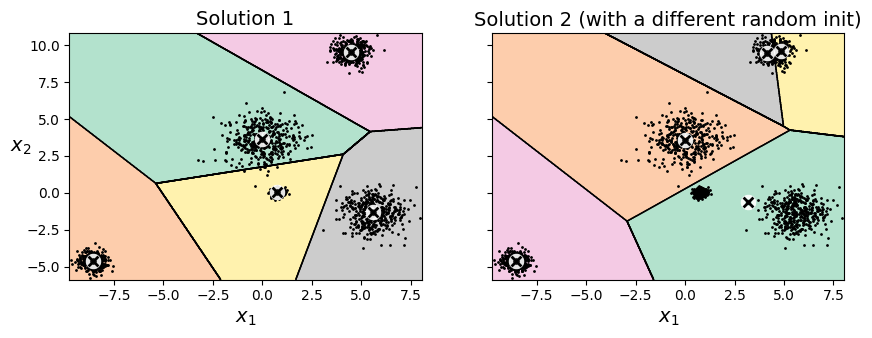

In [18]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

## Aplicación de K-Means con 10 Inicializaciones Aleatorias

Se configuró el algoritmo *K-Means* con 5 clusters y se estableció para realizar 10 inicializaciones aleatorias de los centroides. Luego, se ajustó el modelo a los datos `X` utilizando el método `fit()`, lo que permitió encontrar los centroides óptimos y asignar cada punto a su cluster correspondiente.

In [19]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="lloyd", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=11)

*Visualización de las Fronteras de Decisión de K-Means*


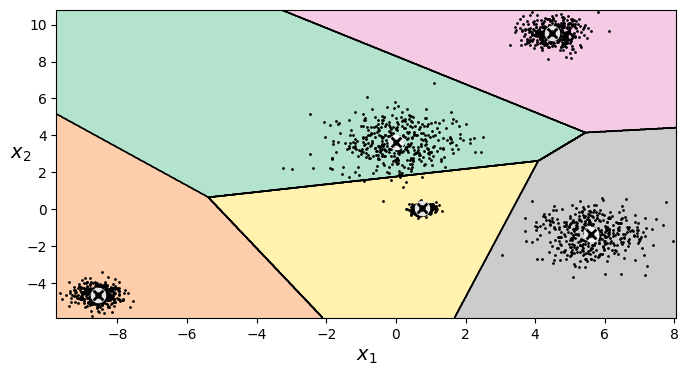

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

## *Entrenamiento del modelo*

## División de Datos en Conjuntos de Entrenamiento y Prueba

Se utilizó la función `train_test_split` para dividir los datos en conjuntos de entrenamiento y prueba. En este caso, se separaron las características `X` y las etiquetas `y`, asegurando que los datos se mezclaran aleatoriamente (`shuffle=True`) y utilizando una semilla de aleatoriedad (`random_state=42`) para garantizar la reproducibilidad.

Los conjuntos resultantes son `X_train` y `y_train` para el entrenamiento, y `X_test` y `y_test` para la prueba.

In [21]:
from sklearn.model_selection import train_test_split

# Dividir los datos (X) y las nuevas etiquetas (y_pred) en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_pred, shuffle=True, random_state=42)

# Verificar la forma de los datos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (1500, 2)
Tamaño de X_test: (500, 2)
Tamaño de y_train: (1500,)
Tamaño de y_test: (500,)


## Ajuste y Evaluación de un Modelo de Regresión Logística

Se creó un modelo de regresión logística utilizando la clase `LogisticRegression` con parámetros específicos, incluyendo un enfoque de clasificación multiclase con *one-vs-rest* (`multi_class="ovr"`), el solucionador *LBFGS*, un máximo de 5000 iteraciones y una semilla de aleatoriedad para la reproducibilidad.

A continuación, se ajustó el modelo a los datos de entrenamiento (`X_train` y `y_train`) y se registró el tiempo que tomó este proceso con `%time`. Tras el ajuste, se evaluó el rendimiento del modelo en los conjuntos de prueba y entrenamiento utilizando el método `score()`, que calcula la precisión.

In [22]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística con los mismos parámetros
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Ajustar el modelo a los datos de entrenamiento utilizando las etiquetas de KMeans
%time log_reg2.fit(X_train, y_train)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy_test = log_reg2.score(X_test, y_test)
# Evaluar el rendimiento del modelo en el conjunto de entrenamiento
accuracy_train = log_reg2.score(X_train, y_train)

# Mostrar los resultados de precisión
print(f"Precisión del modelo en los datos de entrenamiento: {accuracy_train}")
print(f"Precisión del modelo en los datos de prueba: {accuracy_test}")

CPU times: user 21.8 ms, sys: 12 µs, total: 21.8 ms
Wall time: 29.1 ms
Precisión del modelo en los datos de entrenamiento: 0.9893333333333333
Precisión del modelo en los datos de prueba: 0.986


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


# *Punto 2*

## Descarga y Preparación del Conjunto de Datos

Se importaron las bibliotecas necesarias, incluyendo `kagglehub` y `os`, para descargar y manejar los archivos del conjunto de datos. Se utilizó la función `dataset_download` de `kagglehub` para descargar la última versión del conjunto de datos de imágenes de mariposas, especificando el identificador del dataset.

Una vez completada la descarga, se imprimió la ruta donde se almacenaron los archivos del conjunto de datos. A continuación, se definieron varias rutas: `ruta_origen`, que apuntaba a la ubicación de las imágenes originales; `carpeta_destino`, que se estableció para guardar las imágenes procesadas en una ubicación accesible; y `ruta_csv`, que se designó para almacenar un archivo CSV con información sobre las imágenes.



In [23]:
import kagglehub
import os

# Descargar la última versión del dataset
path = kagglehub.dataset_download("gpiosenka/butterfly-images40-species")

print("Path to dataset files:", path)

# Definir rutas
ruta_origen = '/root/.cache/kagglehub/datasets/gpiosenka/butterfly-images40-species/versions/13/train'
carpeta_destino = '/content/train_centralizado'  # Carpeta para guardar las imágenes procesadas
ruta_csv = '/content/info_imagenes.csv'  # Ruta para guardar el CSV
parte_ruta_a_reemplazar = '/root/.cache/kagglehub/datasets/gpiosenka/butterfly-images40-species/versions/13/train'
nueva_ruta = 'train'

# Crear la carpeta de destino si no existe
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)


100%|██████████| 399M/399M [00:04<00:00, 104MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gpiosenka/butterfly-images40-species/versions/13


## Procesamiento y Registro de Imágenes

Se importaron las bibliotecas `shutil` y `csv` para mover archivos y manejar el archivo CSV. Se creó un nuevo archivo CSV y se definieron los encabezados: *Nombre original*, *Subcarpeta origen*, *Nuevo nombre*, *Ruta nueva* y *Ruta original*.

Utilizando `os.walk`, se recorrieron los archivos en `ruta_origen`, enfocándose en aquellos con la extensión ".jpg". Para cada imagen, se generó un nuevo nombre único, asegurando que no hubiera duplicados. Se formateó la ruta original y se movieron los archivos a la carpeta de destino usando `shutil.move`.

Finalmente, se registró la información de cada imagen en el CSV y se imprimió un mensaje confirmando que el proceso se había completado exitosamente.

In [24]:
import shutil
import csv

# Crear y abrir un archivo CSV para guardar la información
with open(ruta_csv, mode='w', newline='') as archivo_csv:
    writer = csv.writer(archivo_csv)
    # Escribir encabezados
    writer.writerow(['Nombre original', 'Subcarpeta origen', 'Nuevo nombre', 'Ruta nueva', 'Ruta original'])

    prefix_counter = 0
    for root, dirs, files in os.walk(ruta_origen):
        for file in files:
            if file.endswith(".jpg"):
                ruta_original = os.path.join(root, file)
                subcarpeta_origen = os.path.basename(root)  # Nombre de la subcarpeta

                # Crear nuevo nombre con prefijo
                nombre_base, extension = os.path.splitext(file)
                nuevo_nombre = f"{prefix_counter}_{nombre_base.zfill(3)}{extension}"
                ruta_nueva = os.path.join(carpeta_destino, nuevo_nombre)

                # Evitar duplicados
                counter = 1
                while os.path.exists(ruta_nueva):
                    base, extension = os.path.splitext(nuevo_nombre)
                    ruta_nueva = os.path.join(carpeta_destino, f"{base}_{counter}{extension}")
                    counter += 1

                ruta_original_formateada = os.path.join(nueva_ruta, subcarpeta_origen, nombre_base.zfill(3) + extension)

                # Mover archivo y guardar info en CSV
                shutil.move(ruta_original, ruta_nueva)
                writer.writerow([file, subcarpeta_origen, nuevo_nombre, ruta_nueva, ruta_original_formateada])

                prefix_counter += 1

print(f"Información de las imágenes guardada en '{ruta_csv}'.")


Información de las imágenes guardada en '/content/info_imagenes.csv'.


## Combinación de Rutas y Etiquetas

Se utilizó la biblioteca `pandas` para cargar dos archivos CSV: uno con las rutas de las imágenes y otro con las etiquetas de las especies. Se renombró la columna de rutas en el DataFrame de imágenes para asegurar que coincidiera con el DataFrame de etiquetas.

Luego, se combinaron ambos DataFrames según las rutas de las imágenes, conservando solo las coincidencias. Finalmente, se guardó el DataFrame resultante en un nuevo archivo CSV llamado `nuevas_rutas_con_labels.csv`, y se imprimió un mensaje confirmando el guardado.

In [25]:
import pandas as pd

# Cargar CSV con rutas e imágenes y otro CSV con etiquetas
csv_rutas = '/content/info_imagenes.csv'
csv_labels = '/root/.cache/kagglehub/datasets/gpiosenka/butterfly-images40-species/versions/13/butterflies and moths.csv'
csv_salida = 'nuevas_rutas_con_labels.csv'

df_rutas = pd.read_csv(csv_rutas)
df_labels = pd.read_csv(csv_labels)

# Renombrar columnas para asegurar coincidencias
df_rutas.rename(columns={'Ruta original': 'filepaths'}, inplace=True)

# Combinar DataFrames en base a las rutas
df_combined = pd.merge(df_rutas, df_labels, on='filepaths', how='inner')

# Guardar el DataFrame combinado con las nuevas rutas y etiquetas
df_combined[['Ruta nueva', 'labels']].to_csv(csv_salida, index=False)

print(f"CSV combinado guardado como: {csv_salida}")


CSV combinado guardado como: nuevas_rutas_con_labels.csv


## Conversión de Imágenes a Datos Numéricos

Se importaron las bibliotecas necesarias y se definió una función para convertir imágenes a arrays numéricos. Esta función abría la imagen, la convertía a escala de grises, la redimensionaba a 28x28 píxeles y la aplanaba.

Luego, se cargó el CSV con las rutas y etiquetas de las imágenes. Se recorrieron las rutas y, si la imagen existía, se convertía a datos numéricos y se guardaba junto con su ruta y etiqueta en una lista.

Finalmente, se creó un DataFrame con estos datos y se guardó en un nuevo archivo CSV llamado `datos_imagenes_procesados.csv`.

In [26]:
import numpy as np
from PIL import Image

# Función para convertir imagen a array numérico
def image_to_numeric(image_path):
    img = Image.open(image_path).convert('L')  # Escala de grises
    img_resized = img.resize((28, 28))  # Redimensionar
    return np.array(img_resized).flatten()

# Leer el CSV con rutas y etiquetas
labels_df = pd.read_csv(csv_salida)

# Lista para almacenar los datos
data = []
for index, row in labels_df.iterrows():
    image_path = row['Ruta nueva']
    label = row['labels']

    if os.path.exists(image_path):
        img_data = image_to_numeric(image_path)
        data.append(img_data.tolist() + [image_path, label])

# Crear DataFrame con datos de imágenes
columnas = [f'pixel_{i}' for i in range(28*28)] + ['Ruta', 'Label']
df_final = pd.DataFrame(data, columns=columnas)

# Guardar en CSV
df_final.to_csv('datos_imagenes_procesados.csv', index=False)
print("Datos procesados guardados en 'datos_imagenes_procesados.csv'")

Datos procesados guardados en 'datos_imagenes_procesados.csv'


*Carga y Análisis del CSV de Datos de Imágenes*

Se cargó el CSV generado que contenía los datos numéricos de las imágenes y se mostró una vista previa de las primeras filas del DataFrame.

In [27]:
# Cargar CSV generado
df = pd.read_csv('datos_imagenes_procesados.csv')

# Mostrar primeras filas
print(df.head())

# Información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      120      122      120      121      128      132      133      133   
1       96       54       61       83       73       73      136      140   
2       29       41       49       46       41       46       51       52   
3       79       50       46       55       76       99       94       72   
4      106      104      103      104      105      104      104      104   

   pixel_8  pixel_9  ...  pixel_776  pixel_777  pixel_778  pixel_779  \
0      130      131  ...        132        134        139        146   
1      117      111  ...         70         69         66         61   
2       45       41  ...         23         23         22         35   
3       89      140  ...         82         93        120        128   
4      103      105  ...        126        156        149         98   

   pixel_780  pixel_781  pixel_782  pixel_783  \
0        139        112        144        148   
1     

In [28]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,Ruta,Label
0,120,122,120,121,128,132,133,133,130,131,...,132,134,139,146,139,112,144,148,/content/train_centralizado/0_063.jpg,PAINTED LADY
1,96,54,61,83,73,73,136,140,117,111,...,70,69,66,61,80,91,94,85,/content/train_centralizado/1_054.jpg,PAINTED LADY
2,29,41,49,46,41,46,51,52,45,41,...,23,23,22,35,41,24,23,22,/content/train_centralizado/2_109.jpg,PAINTED LADY
3,79,50,46,55,76,99,94,72,89,140,...,82,93,120,128,74,46,46,50,/content/train_centralizado/3_048.jpg,PAINTED LADY
4,106,104,103,104,105,104,104,104,103,105,...,126,156,149,98,138,176,167,160,/content/train_centralizado/4_025.jpg,PAINTED LADY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12589,42,38,37,38,36,76,221,177,151,147,...,101,140,166,175,107,25,29,0,/content/train_centralizado/12589_008.jpg,CLOUDED SULPHUR
12590,37,38,38,59,209,184,152,146,153,163,...,150,171,170,182,84,30,35,0,/content/train_centralizado/12590_037.jpg,CLOUDED SULPHUR
12591,96,61,41,55,60,52,89,75,73,69,...,195,213,210,218,194,211,210,178,/content/train_centralizado/12591_072.jpg,CLOUDED SULPHUR
12592,255,255,255,255,255,255,255,255,255,255,...,148,236,255,255,255,255,255,255,/content/train_centralizado/12592_004.jpg,CLOUDED SULPHUR


## Codificación de Etiquetas y Guardado de Resultados

Se creó un objeto `LabelEncoder` para transformar la columna de etiquetas en valores numéricos. Se ajustó y se aplicó el transformador a la columna `Label`, generando una nueva columna llamada `labels_numericos`.

Se elaboró un diccionario que mapea las etiquetas originales a sus correspondientes valores numéricos. Esto facilitó la interpretación de las etiquetas transformadas.

Finalmente, se imprimió la matriz de mapeo de etiquetas y se guardaron los resultados en un nuevo archivo CSV llamado `datos_imagenes_procesadas_con_labels_numericos.csv`.

In [29]:
from sklearn.preprocessing import LabelEncoder
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la columna de etiquetas
df['labels_numericos'] = label_encoder.fit_transform(df['Label'])

# Crear un diccionario que mapee las etiquetas originales a los nuevos valores numéricos
etiquetas_originales = label_encoder.classes_
valores_numericos = range(len(etiquetas_originales))

mapeo_etiquetas = dict(zip(etiquetas_originales, valores_numericos))

# Imprimir la matriz de mapeo
print("\nMatriz de mapeo de etiquetas:")
print(mapeo_etiquetas)

# Guardar el nuevo CSV si es necesario
df.to_csv('datos_imagenes_procesadas_con_labels_numericos.csv', index=False)


Matriz de mapeo de etiquetas:
{'ADONIS': 0, 'AFRICAN GIANT SWALLOWTAIL': 1, 'AMERICAN SNOOT': 2, 'AN 88': 3, 'APPOLLO': 4, 'ARCIGERA FLOWER MOTH': 5, 'ATALA': 6, 'ATLAS MOTH': 7, 'BANDED ORANGE HELICONIAN': 8, 'BANDED PEACOCK': 9, 'BANDED TIGER MOTH': 10, 'BECKERS WHITE': 11, 'BIRD CHERRY ERMINE MOTH': 12, 'BLACK HAIRSTREAK': 13, 'BLUE MORPHO': 14, 'BLUE SPOTTED CROW': 15, 'BROOKES BIRDWING': 16, 'BROWN ARGUS': 17, 'BROWN SIPROETA': 18, 'CABBAGE WHITE': 19, 'CAIRNS BIRDWING': 20, 'CHALK HILL BLUE': 21, 'CHECQUERED SKIPPER': 22, 'CHESTNUT': 23, 'CINNABAR MOTH': 24, 'CLEARWING MOTH': 25, 'CLEOPATRA': 26, 'CLODIUS PARNASSIAN': 27, 'CLOUDED SULPHUR': 28, 'COMET MOTH': 29, 'COMMON BANDED AWL': 30, 'COMMON WOOD-NYMPH': 31, 'COPPER TAIL': 32, 'CRECENT': 33, 'CRIMSON PATCH': 34, 'DANAID EGGFLY': 35, 'EASTERN COMA': 36, 'EASTERN DAPPLE WHITE': 37, 'EASTERN PINE ELFIN': 38, 'ELBOWED PIERROT': 39, 'EMPEROR GUM MOTH': 40, 'GARDEN TIGER MOTH': 41, 'GIANT LEOPARD MOTH': 42, 'GLITTERING SAPPHIRE': 4

In [30]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,Ruta,Label,labels_numericos
0,120,122,120,121,128,132,133,133,130,131,...,134,139,146,139,112,144,148,/content/train_centralizado/0_063.jpg,PAINTED LADY,70
1,96,54,61,83,73,73,136,140,117,111,...,69,66,61,80,91,94,85,/content/train_centralizado/1_054.jpg,PAINTED LADY,70
2,29,41,49,46,41,46,51,52,45,41,...,23,22,35,41,24,23,22,/content/train_centralizado/2_109.jpg,PAINTED LADY,70
3,79,50,46,55,76,99,94,72,89,140,...,93,120,128,74,46,46,50,/content/train_centralizado/3_048.jpg,PAINTED LADY,70
4,106,104,103,104,105,104,104,104,103,105,...,156,149,98,138,176,167,160,/content/train_centralizado/4_025.jpg,PAINTED LADY,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12589,42,38,37,38,36,76,221,177,151,147,...,140,166,175,107,25,29,0,/content/train_centralizado/12589_008.jpg,CLOUDED SULPHUR,28
12590,37,38,38,59,209,184,152,146,153,163,...,171,170,182,84,30,35,0,/content/train_centralizado/12590_037.jpg,CLOUDED SULPHUR,28
12591,96,61,41,55,60,52,89,75,73,69,...,213,210,218,194,211,210,178,/content/train_centralizado/12591_072.jpg,CLOUDED SULPHUR,28
12592,255,255,255,255,255,255,255,255,255,255,...,236,255,255,255,255,255,255,/content/train_centralizado/12592_004.jpg,CLOUDED SULPHUR,28


## Identificación del número óptimo de clusters


1. **Preparación de Datos**: Se extrajeron y escalaron las columnas de píxeles usando `StandardScaler`.

2. **Método del Codo**: Se calculó la inercia para \( k \) de 2 a 10, graficando los resultados para identificar el número óptimo de clusters.

3. **Silhouette Score**: Se calculó el Silhouette Score para evaluar la calidad de los clusters, generando otra gráfica.

4. **Resultados**: Se imprimieron las inercia y el Silhouette Score para cada \( k \), y se determinó el mejor número de clusters basado en el Silhouette Score.

Este análisis sentó las bases para una segmentación más efectiva de las imágenes en futuros estudios.


Calculando para k=2
Calculando para k=3
Calculando para k=4
Calculando para k=5
Calculando para k=6
Calculando para k=7
Calculando para k=8
Calculando para k=9
Calculando para k=10


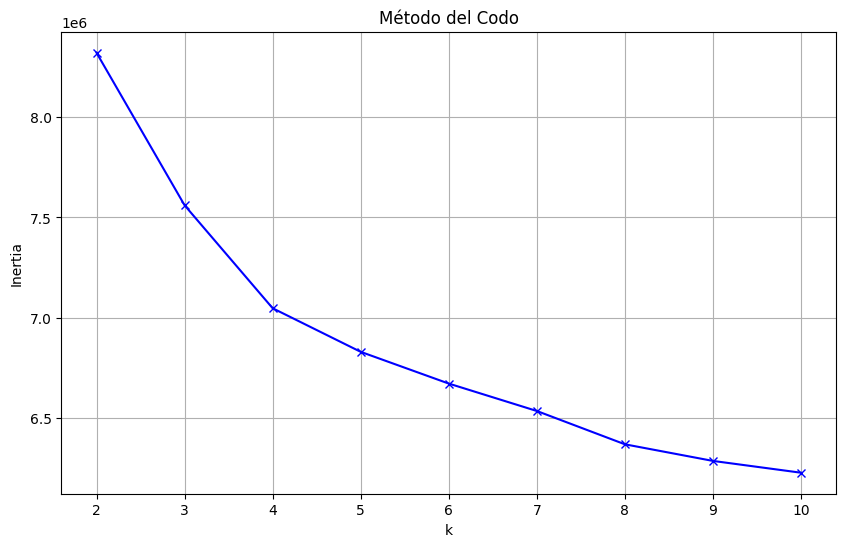

Calculando Silhouette Score para k=2
Calculando Silhouette Score para k=3
Calculando Silhouette Score para k=4
Calculando Silhouette Score para k=5
Calculando Silhouette Score para k=6
Calculando Silhouette Score para k=7
Calculando Silhouette Score para k=8
Calculando Silhouette Score para k=9
Calculando Silhouette Score para k=10


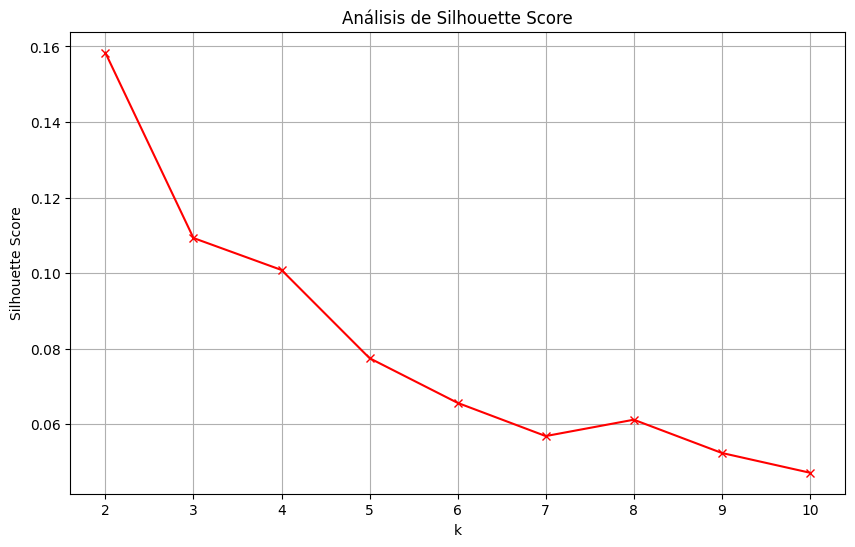


Resultados del análisis:
k=2: Inertia=8320457.35, Silhouette Score=0.158
k=3: Inertia=7560660.85, Silhouette Score=0.109
k=4: Inertia=7047748.65, Silhouette Score=0.101
k=5: Inertia=6830494.78, Silhouette Score=0.077
k=6: Inertia=6672423.89, Silhouette Score=0.066
k=7: Inertia=6535864.58, Silhouette Score=0.057
k=8: Inertia=6369933.75, Silhouette Score=0.061
k=9: Inertia=6287134.03, Silhouette Score=0.052
k=10: Inertia=6228394.80, Silhouette Score=0.047

Mejor número de clusters según Silhouette Score: 2


In [31]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Supongamos que df ya está definido desde la celda anterior

# Obtener solo las columnas de píxeles (excluyendo Nombre, Ruta y labels_numericos)
X = df[[col for col in df.columns if col.startswith('pixel_')]]  # Asegúrate de que las columnas de píxeles comiencen con 'pixel_'

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo
inertias = []
K = range(2, 11)

for k in K:
    print(f"Calculando para k={k}")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visualización del método del codo
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

# Silhouette Score
silhouette_scores = []

for k in K:
    print(f"Calculando Silhouette Score para k={k}")
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualización del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Análisis de Silhouette Score')
plt.grid(True)
plt.show()

# Imprimir los resultados
print("\nResultados del análisis:")
for k, inertia, silhouette in zip(K, inertias, silhouette_scores):
    print(f"k={k}: Inertia={inertia:.2f}, Silhouette Score={silhouette:.3f}")

# Encontrar el mejor k según Silhouette Score
best_k = K[np.argmax(silhouette_scores)]
print(f"\nMejor número de clusters según Silhouette Score: {best_k}")


## *Preparación y División de Datos para Entrenamiento y Prueba*

Se prepararon los datos para entrenar un modelo de regresión logística definiendo \( X \) como las primeras 784 columnas del DataFrame, que representan las características de las imágenes, y \( y \) como la columna de etiquetas numéricas. Luego, se generó un índice aleatorio para reordenar \( X \) e \( y \), asegurando que los datos estuvieran mezclados. Posteriormente, se dividieron los datos en conjuntos de entrenamiento y prueba utilizando `train_test_split`, asignando el 80% para entrenamiento y el 20% para prueba. Finalmente, se verificaron las dimensiones de los conjuntos para confirmar que la división se realizó correctamente.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Supongamos que df ya está definido desde la celda anterior

# Definir X como las primeras 784 columnas y y como la columna 'labels_numericos'
X = df.iloc[:, :784]  # Tomar las primeras 784 columnas
y = df['labels_numericos']  # Usar la columna con etiquetas numéricas

print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)

# Hacer Random
# Generar un índice aleatorio
indices = np.random.permutation(len(X))

# Reordenar X e y según el índice aleatorio
X_shuffled = X.iloc[indices].reset_index(drop=True)
y_shuffled = y.iloc[indices].reset_index(drop=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

# Verificar dimensiones
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")


Tamaño de X: (12594, 784)
Tamaño de y: (12594,)
Tamaño de X_train: (10075, 784)
Tamaño de X_test: (2519, 784)
Tamaño de y_train: (10075,)
Tamaño de y_test: (2519,)


## **Aprendizaje Semi-Supervizado**

## Aplicación de K-Means para Clustering

Se utilizó el algoritmo K-Means para realizar clustering en el conjunto de entrenamiento \( X_{\text{train}} \). Se estableció \( k \) en 196, lo que representa el número de clusters a formar. Al aplicar `fit_transform`, se calcularon las distancias de cada muestra en \( X_{\text{train}} \) a los centros de los clusters generados por el modelo. Esto permitió obtener una matriz de distancias \( X_{\text{digits\_dist}} \) que refleja la proximidad de cada punto de datos a cada uno de los 196 clusters.

In [33]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [34]:
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train.values[idxs]

## Selección de Representantes en Clusters

Se obtuvieron los índices de los valores mínimos en la matriz de distancias \( X_{\text{digits\_dist}} \) utilizando `np.argmin`, lo que permitió identificar los puntos más cercanos a cada centro de cluster. A continuación, se seleccionaron los representantes de \( X_{\text{train}} \) basándose en estos índices, formando así un nuevo conjunto \( X_{\text{representative\_digits}} \).

In [35]:
import numpy as np

# Obtener los índices de los valores mínimos en X_digits_dist
idxs = np.argmin(X_digits_dist, axis=0)

# Seleccionar los representantes de X_train basados en esos índices
X_representative_digits = X_train.values[idxs]

# Imprimir la longitud o tamaño de X_representative_digits
print(f"Tamaño de X_representative_digits: {X_representative_digits.shape}")


Tamaño de X_representative_digits: (4, 784)


### *Visualización de Representantes de Clusters*



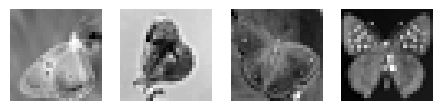

In [36]:
import matplotlib.pyplot as plt
# Ajustar la cuadrícula para acomodar más imágenes
num_images = len(X_representative_digits)
rows = (num_images // 10) + 1  # Incrementar el número de filas

plt.figure(figsize=(14, 14))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(rows, 10, index+1)
    plt.imshow(X_representative_digit.reshape(28, 28), cmap="binary")
    plt.axis('off')

plt.show()

### Selección de Etiquetas Correspondientes a Representantes

Se seleccionaron las etiquetas correspondientes a las imágenes representativas obtenidas de \( X_{\text{representative\_digits}} \) utilizando los mismos índices mínimos (\( idxs \)) obtenidos previamente. Esto generó un array \( y_{\text{representative\_digits}} \) que contiene las etiquetas de las muestras representativas.

In [37]:
y_representative_digits = y_train.values[idxs]
print(f"Número de muestras en y_representative_digits: {y_representative_digits.shape[0]}")

Número de muestras en y_representative_digits: 4


## Entrenamiento del Modelo de Regresión Logística

Se creó un modelo de regresión logística utilizando la configuración de varios parámetros, incluyendo el enfoque de clasificación multiclase "one-vs-rest" y el solucionador "lbfgs". Se ajustó el modelo con las imágenes representativas (\( X_{\text{representative\_digits}} \)) y sus correspondientes etiquetas (\( y_{\text{representative\_digits}} \)).
Se registró el tiempo de entrenamiento del modelo y, posteriormente, se evaluó su precisión en el conjunto de prueba (\( X_{\text{test}} \) y \( y_{\text{test}} \)).

In [38]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=100000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)

CPU times: user 40.2 ms, sys: 39.8 ms, total: 80 ms
Wall time: 42.8 ms


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.018261214767764985

In [39]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=100000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 436 ms, sys: 357 ms, total: 793 ms
Wall time: 448 ms


0.034140531957125846

*Propagación de Etiquetas en el Conjunto de Entrenamiento*

In [40]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [41]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=100000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 4.55 s, sys: 1.23 s, total: 5.78 s
Wall time: 3.03 s


0.015482334259626836

## **Aprendizaje Activo**

## Predicción de Probabilidades y Selección de Etiquetas

Se calcularon las probabilidades de clase para las primeras 1000 muestras del conjunto de entrenamiento utilizando el modelo de regresión logística `log_reg3`. Se identificaron las clases con las probabilidades más altas y se extrajeron esas probabilidades. Luego, se ordenaron y se mostraron las 10 probabilidades más bajas, lo que ayuda a identificar las muestras con menor confianza en su clasificación.

In [42]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.99821661, 0.99890273, 0.99893732, 0.99897555, 0.99899104,
       0.99900705, 0.99900811, 0.99901861, 0.99903311, 0.99905168])

*Visualización de Imágenes con Menor Confianza en la Clasificación*

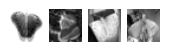

In [43]:
X_lowest = X_train.values[:1000][sorted_ixs[:k]]
plt.figure(figsize=(10, 4))
for index, img in enumerate(X_lowest):
    plt.subplot(rows, 20, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [44]:
y_lowest = y_train.values[:1000][sorted_ixs[:k]]
y_lowest

array([91, 84, 89, 60])

*Actualización de Etiquetas para las Muestras con Menor Confianza*

In [45]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

**Entrenamiento del Modelo de Regresión Logística y Evaluación**

In [46]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 4.24 s, sys: 2.23 s, total: 6.46 s
Wall time: 5.76 s


0.0166732830488289

# *Punto 3*

Importacion de librerias

In [47]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cargado del dataset

In [49]:
# 1. Cargar los datos y tomar una muestra aleatoria
df = pd.read_csv('/content/drive/MyDrive/Universidad/2-2024/sis420/Laboratorios/Lab5/Datasets/train.csv')
sample_size = 60000  # Ajusta este número según tu capacidad de procesamiento
df_sample = df.sample(n=sample_size, random_state=42)

print(f"Tamaño original del dataset: {len(df)}")
print(f"Tamaño de la muestra: {len(df_sample)}")

Tamaño original del dataset: 1458644
Tamaño de la muestra: 60000


### Exploración y Limpieza de Datos en la Muestra

Se exploró el DataFrame `df_sample` utilizando `info()` para obtener información sobre su estructura y `isnull().sum()` para contar los valores nulos. Si se encontraron filas con valores nulos, se eliminaron con `dropna()`. Además, se convirtió la columna `pickup_datetime` a formato de fecha y hora usando `pd.to_datetime()` para facilitar su análisis posterior.

In [50]:
# 2. Explorar y limpiar los datos de la muestra
print(df_sample.info())
print(df_sample.isnull().sum())

# Eliminar filas con valores nulos si existen
df_sample = df_sample.dropna()

# Convertir columnas de fecha a datetime
df_sample['pickup_datetime'] = pd.to_datetime(df_sample['pickup_datetime'])

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 67250 to 505752
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  60000 non-null  object 
 1   vendor_id           60000 non-null  int64  
 2   pickup_datetime     60000 non-null  object 
 3   dropoff_datetime    60000 non-null  object 
 4   passenger_count     60000 non-null  int64  
 5   pickup_longitude    60000 non-null  float64
 6   pickup_latitude     60000 non-null  float64
 7   dropoff_longitude   60000 non-null  float64
 8   dropoff_latitude    60000 non-null  float64
 9   store_and_fwd_flag  60000 non-null  object 
 10  trip_duration       60000 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 5.5+ MB
None
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude  

## Preprocesamiento y Selección de Características Relevantes

Se extrajeron características de la columna `pickup_datetime`, creando nuevas columnas para la hora, el día y el mes mediante la conversión de datos de fecha. Luego, se seleccionaron las características relevantes para el clustering, incluyendo longitudes y latitudes de recogida y entrega, el conteo de pasajeros, y las nuevas columnas de tiempo. Estas características se almacenaron en el DataFrame `X`.

A continuación, se utilizaron técnicas de escalado para normalizar los datos con `StandardScaler`, lo que permitió mejorar el rendimiento de los algoritmos de clustering. Posteriormente, se aplicó la reducción de dimensionalidad con *Análisis de Componentes Principales* (PCA), manteniendo el 95% de la varianza explicada, para simplificar el conjunto de datos y facilitar el análisis posterior.

In [51]:
# 3. Preprocesar y seleccionar características relevantes
# Extraer características de la fecha
df_sample['hour'] = df_sample['pickup_datetime'].dt.hour
df_sample['day'] = df_sample['pickup_datetime'].dt.day
df_sample['month'] = df_sample['pickup_datetime'].dt.month

# Seleccionar características para clustering
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month']
X = df_sample[features]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir dimensionalidad con PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

## *Aplicación de DBScan*

Se aplicó el algoritmo de clustering DBSCAN utilizando un valor de eps de 1.5 y un mínimo de 20 muestras para definir un cluster. Esto permitió identificar grupos de datos en el conjunto reducido mediante PCA, asignando etiquetas de cluster a cada punto en clusters.

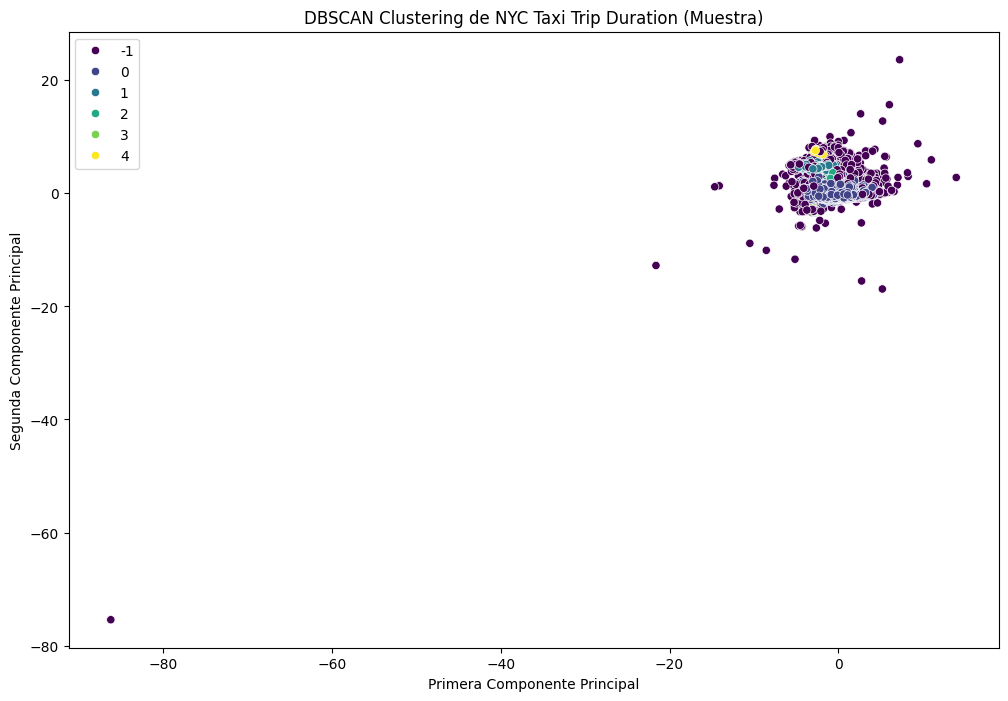

In [52]:
# 4. Aplicar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=20)
clusters = dbscan.fit_predict(X_pca)

# 5. Visualizar los resultados
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('DBSCAN Clustering de NYC Taxi Trip Duration (Muestra)')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.show()

## Análisis de Resultados del Clustering

Se analizó el resultado del clustering obtenido mediante DBSCAN. Se calculó el número de clusters identificados, restando uno si se incluyó el valor -1, que representa los puntos de ruido. Esto se realizó utilizando `len(set(clusters))`, que cuenta los clusters únicos.

Además, se contabilizó el número de puntos considerados ruido, que se identifican con el valor -1 en la variable `clusters`, utilizando `list(clusters).count(-1)`.

In [53]:
# Analizar los resultados
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 5
Número de puntos de ruido: 1373


### Cálculo de Estadísticas de los Clusters

Se añadieron los resultados del clustering al DataFrame `df_sample` mediante la creación de una nueva columna llamada `cluster`. Esto permitió asociar cada punto con su respectivo cluster.

A continuación, se calcularon estadísticas descriptivas para cada cluster utilizando el método `groupby()`. Se agruparon los datos por la columna `cluster` y se calcularon la media y la mediana de la duración del viaje (`trip_duration`), así como la media del conteo de pasajeros y las coordenadas de recogida y entrega (longitudes y latitudes).


In [54]:
# Estadísticas de los clusters
df_sample['cluster'] = clusters
cluster_stats = df_sample.groupby('cluster').agg({
    'trip_duration': ['mean', 'median'],
    'passenger_count': 'mean',
    'pickup_longitude': 'mean',
    'pickup_latitude': 'mean',
    'dropoff_longitude': 'mean',
    'dropoff_latitude': 'mean'
})
print(cluster_stats)

        trip_duration         passenger_count pickup_longitude  \
                 mean  median            mean             mean   
cluster                                                          
-1        1908.865987  1563.0        2.645302       -73.898057   
 0         901.250870   639.0        1.654467       -73.978262   
 1        2963.940397  2692.5        1.486755       -73.784873   
 2        3237.876214  2690.0        1.293689       -73.982257   
 3        2399.157895  2315.0        1.140351       -73.986857   
 4         365.021978    81.0        1.175824       -73.785623   

        pickup_latitude dropoff_longitude dropoff_latitude  
                   mean              mean             mean  
cluster                                                     
-1            40.721280        -73.911616        40.724328  
 0            40.753391        -73.976360        40.753395  
 1            40.645852        -73.976585        40.742447  
 2            40.752226        -73.7860

*Visualización alternativa: Mapa de NYC con puntos de recogida*

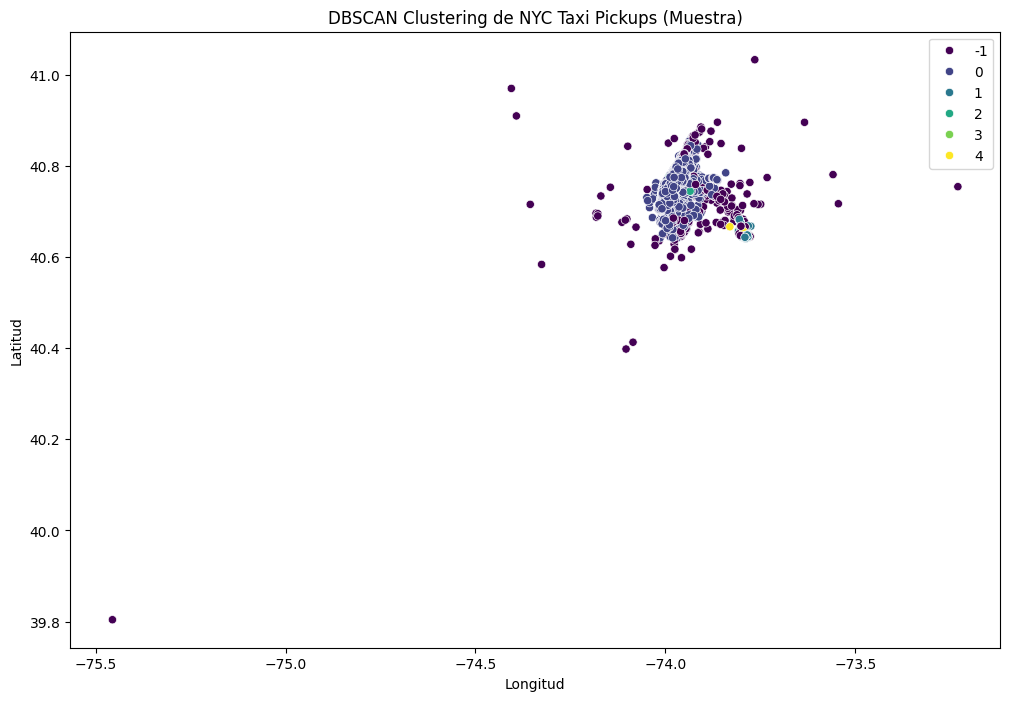

In [55]:
# Visualización alternativa: Mapa de NYC con puntos de recogida
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue=clusters, data=df_sample, palette='viridis')
plt.title('DBSCAN Clustering de NYC Taxi Pickups (Muestra)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

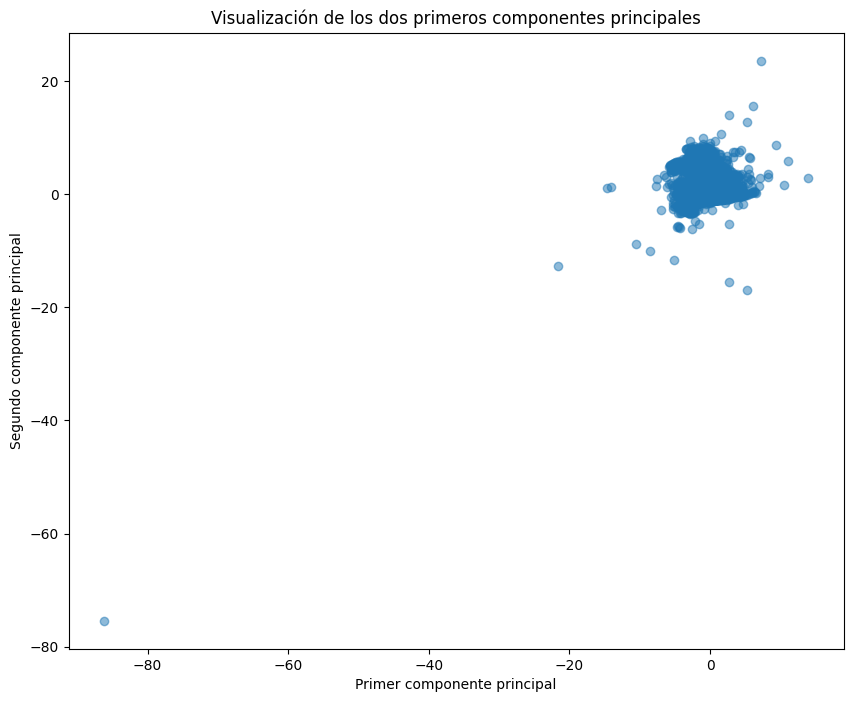

array([[-0.19389847,  0.03451531,  2.00081254, ...,  0.2107669 ,
         0.04808437,  0.62670325],
       [ 0.12872157, -0.42784726,  1.30674402, ..., -0.73987623,
        -0.34254825, -0.24530786],
       [-0.2192791 ,  0.02483875,  1.53005987, ..., -0.74658818,
         0.07802849,  0.16654892],
       ...,
       [-0.07673229, -0.32759279, -1.00215304, ...,  0.11366154,
        -0.0095608 ,  0.29642479],
       [ 0.66282296, -0.11979439, -0.87827838, ...,  0.68225921,
         0.33537857,  0.34225548],
       [ 1.09747583, -0.28695851, -1.24403712, ..., -0.32696527,
        -0.21801639, -0.07038975]])

In [56]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Visualización de los dos primeros componentes principales')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.show()
X_pca

## División de Datos en Conjuntos de Entrenamiento y Prueba

Se dividieron los datos reducidos mediante PCA en conjuntos de entrenamiento y prueba utilizando la función `train_test_split`. En esta etapa, se asignaron las características reducidas `X_pca` y los clusters identificados como `y`. Se configuró el parámetro `shuffle=True` para mezclar aleatoriamente los datos y se utilizó una semilla de aleatoriedad (`random_state=42`) para garantizar la reproducibilidad del proceso.



In [57]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, clusters, shuffle=True, random_state=42)

# Verificar la forma de los datos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (45000, 8)
Tamaño de X_test: (15000, 8)
Tamaño de y_train: (45000,)
Tamaño de y_test: (15000,)


## Ajuste y Evaluación del Modelo de Regresión Logística

Se creó un modelo de regresión logística utilizando la clase `LogisticRegression`, configurado para clasificación multiclase con el enfoque *one-vs-rest* (`multi_class="ovr"`), un solucionador *LBFGS*, un máximo de 5000 iteraciones y una semilla de aleatoriedad para asegurar la reproducibilidad.

El modelo se ajustó a los datos de entrenamiento (`X_train` y `y_train`), y se registró el tiempo que tomó este ajuste con `%time`. Posteriormente, se evaluó el rendimiento del modelo en los conjuntos de prueba y entrenamiento utilizando el método `score()`, que calcula la precisión.

In [58]:
# Crear el modelo de regresión logística con los mismos parámetros
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
%time log_reg2.fit(X_train, y_train)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy_test = log_reg2.score(X_test, y_test)
# Evaluar el rendimiento del modelo en el conjunto de entrenamiento
accuracy_train = log_reg2.score(X_train, y_train)

print(f"Precisión del modelo en los datos de entrenamiento: {accuracy_train}")
print(f"Precisión del modelo en los datos de prueba: {accuracy_test}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 314 ms, sys: 195 ms, total: 510 ms
Wall time: 267 ms
Precisión del modelo en los datos de entrenamiento: 0.9819555555555556
Precisión del modelo en los datos de prueba: 0.9816


## Creación y Ajuste del Modelo de Mezcla Gaussiana (GMM)

Se creó un modelo de mezcla gaussiana utilizando la clase `GaussianMixture`, configurado con 3 componentes como ejemplo y una semilla de aleatoriedad para asegurar la reproducibilidad. A continuación, se ajustó el modelo a los datos de entrenamiento (`X_train`), permitiendo que el modelo aprendiera las distribuciones subyacentes en los datos.

Después del ajuste, se utilizaron los métodos `predict()` para predecir los clusters en los conjuntos de entrenamiento y prueba, generando las variables `y_train_pred` y `y_test_pred`, respectivamente.

Finalmente, se calculó la precisión del modelo comparando las predicciones con las etiquetas reales utilizando la función `accuracy_score()`.

In [59]:
# Crear y ajustar el modelo GMM
gmm = GaussianMixture(n_components=3, random_state=42)  # Usando 3 componentes como ejemplo

# Ajustar el modelo a los datos de entrenamiento
gmm.fit(X_train)

# Predecir clusters para conjuntos de entrenamiento y prueba
y_train_pred = gmm.predict(X_train)
y_test_pred = gmm.predict(X_test)

# Calcular precisión
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Precisión del modelo en los datos de entrenamiento: {accuracy_train:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy_test:.4f}")

Precisión del modelo en los datos de entrenamiento: 0.6553
Precisión del modelo en los datos de prueba: 0.6477


*Visualización básica de los resultados*

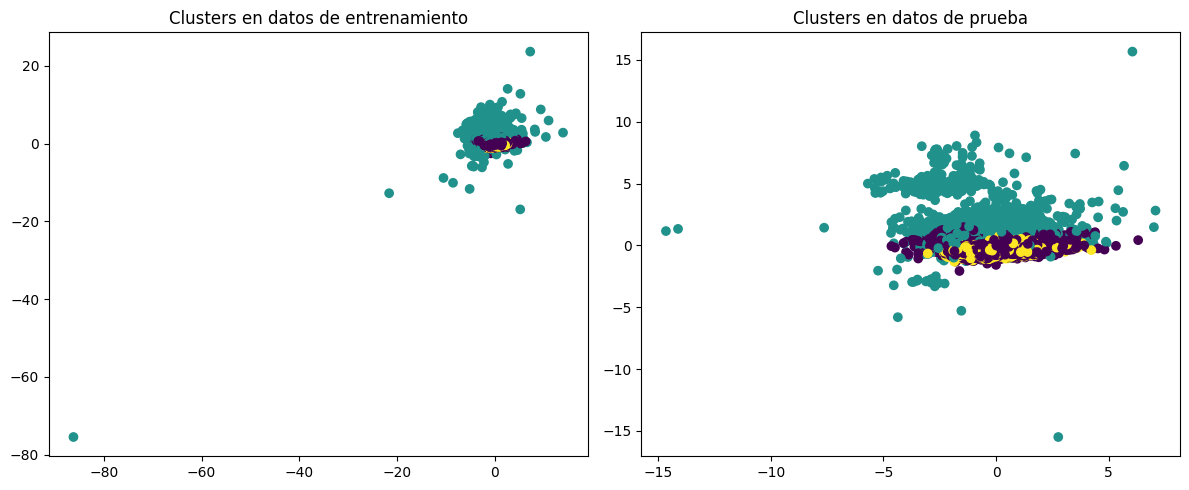

In [60]:
# Visualización básica de los resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='viridis')
plt.title('Clusters en datos de entrenamiento')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='viridis')
plt.title('Clusters en datos de prueba')

plt.tight_layout()
plt.show()